### Composite Trapezoidal Rule

Using composite trapezoidal rule to integrate 5 different functions and then comparing the errors with the actual integration result.

The functions are: 

$f_1(x) = x^2$

$f_2(x) = |x|$

$f_3(x) =
\begin{cases} 
\frac{1}{2}e^x & x < \frac{1}{3} \\
e^x & x \geq \frac{1}{3}
\end{cases}$

$f_4(x) = \sin(\pi x)$

$f_5(x) = \sin(4\pi x)$

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
## Integrand functions

f1 = lambda x: x**2
f2 = lambda x: abs(x)
f3 = lambda x: (1/2)*np.exp(x) if x < 1/3 else np.exp(x) 
f4 = lambda x: math.sin(math.pi * x)
f5 = lambda x: math.sin(4 * math.pi * x)

## Exact integrals

if1 = 2/3
if2 = 1
if3 = ((1/2)*(np.exp(1/3) - np.exp(-1))) + (np.exp(1) - np.exp(1/3))
if4 = 0
if5 = 0

N = 2 ** np.arange(1, 21)
n = len(N)
a = -1
b = 1

err_f1 = np.zeros(n)
err_f2 = np.zeros(n)
err_f3 = np.zeros(n)
err_f4 = np.zeros(n)
err_f5 = np.zeros(n)


for j in range(n):
    h = (b-a) / N[j]
    x = np.arange(-1, 1+h, h)

    yf1 = 0
    yf2 = 0
    yf3 = 0
    yf4 = 0
    yf5 = 0

    for i in range(N[j]):
        yf1 += ((x[i+1] - x[i]) / 2) * (f1(x[i]) + f1(x[i+1]))
        yf2 += ((x[i+1] - x[i]) / 2) * (f2(x[i]) + f2(x[i+1]))
        yf3 += ((x[i+1] - x[i]) / 2) * (f3(x[i]) + f3(x[i+1]))
        yf4 += ((x[i+1] - x[i]) / 2) * (f4(x[i]) + f4(x[i+1]))
        yf5 += ((x[i+1] - x[i]) / 2) * (f5(x[i]) + f5(x[i+1]))

    err_f1[j] = abs(yf1 - if1)
    err_f2[j] = abs(yf2 - if2)
    err_f3[j] = abs(yf3 - if3)
    err_f4[j] = abs(yf4 - if4)
    err_f5[j] = abs(yf5 - if5)
    
        
    
    


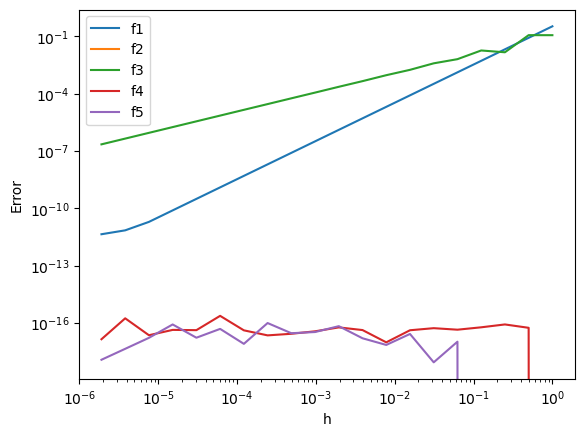

In [8]:
h = [(b-a)/2**i for i in range(1, 21)]

## Plots

plt.loglog(h, err_f1, label = 'f1')
plt.loglog(h, err_f2, label = 'f2')
plt.loglog(h, err_f3, label = 'f3')
plt.loglog(h, err_f4, label = 'f4')
plt.loglog(h, err_f5, label = 'f5')

plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

Observation: Composite trapezoidal rule works very well with functions that are periodic; that's why $f_{4}$ and $f_{5}$ have errors closer to machine precision. The error also decreases and converges to zero for the other functions when the step sizes increase.

### Comparing Uniformly distributed and Chebyshev polynomials

Creating interpolating polynomials for the function $f(x) = (1 + x^2)^{-1}$ using uniformly distributed points and Chebyshev points and comparing which one is closer to the actual polynomial.

In [35]:
import sympy as sym
from sympy.parsing.sympy_parser import parse_expr

def Neville(x, y, x_int):
    n = len(x)
    N = np.zeros((n,n))

    for i in range(n):
        N[i, 0] = y[i]

    for i in range(1, n):
        for j in range(n-i):
            N[j, i] = (((x_int - x[j+i])*N[j, i-1]) + ((x[j] - x_int)*N[j+1, i-1])) / (x[j] - x[j+i])
    return(N[0, -1])

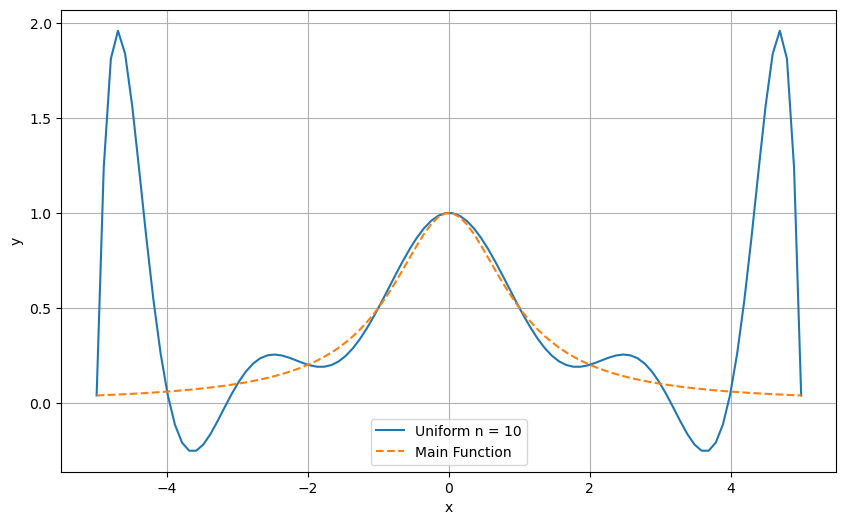

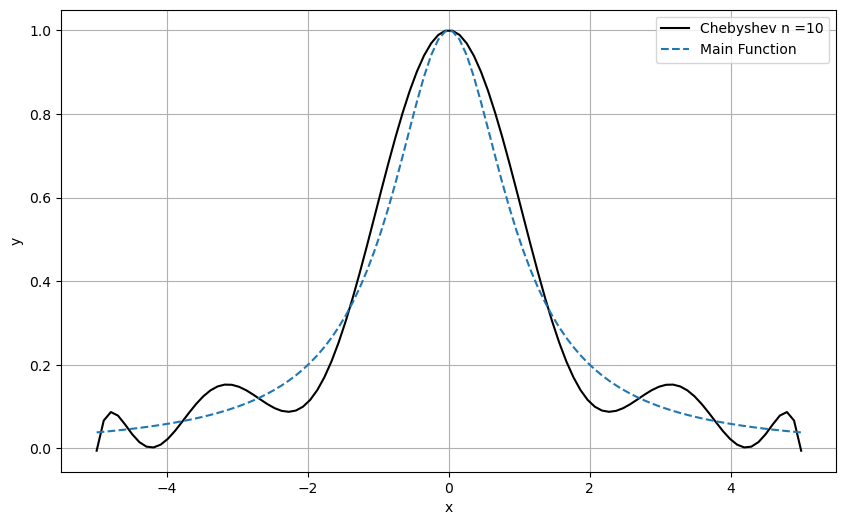

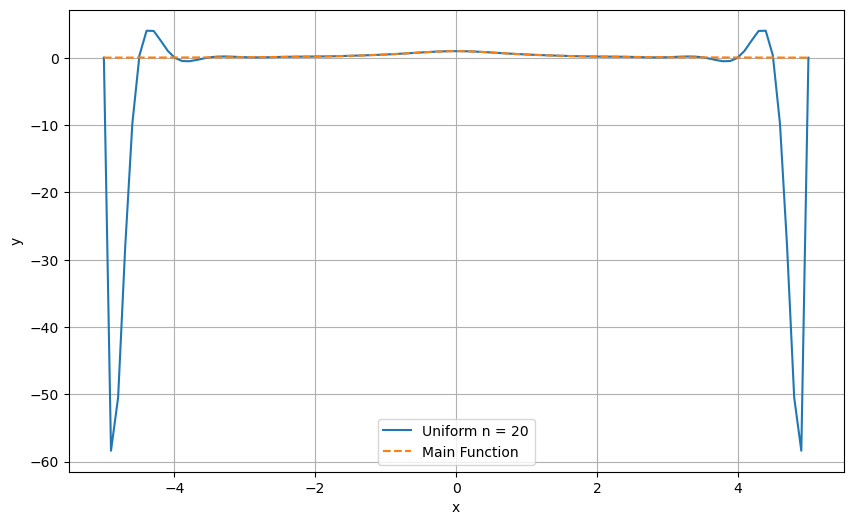

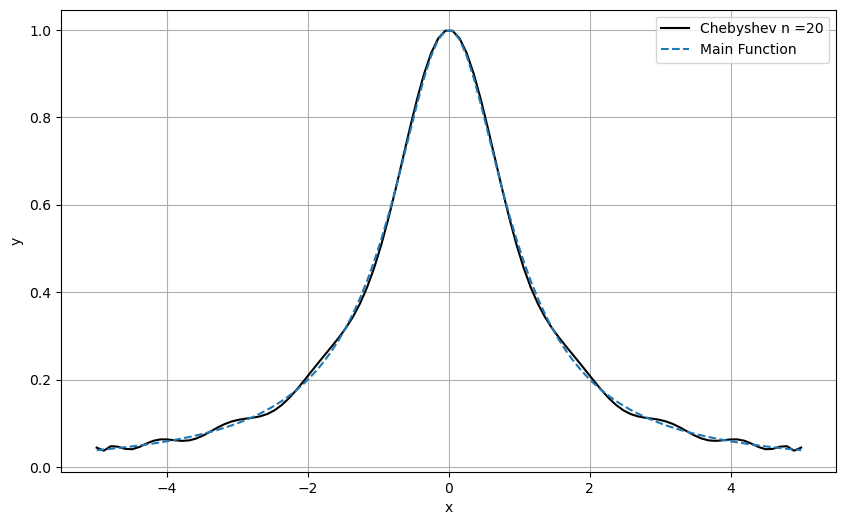

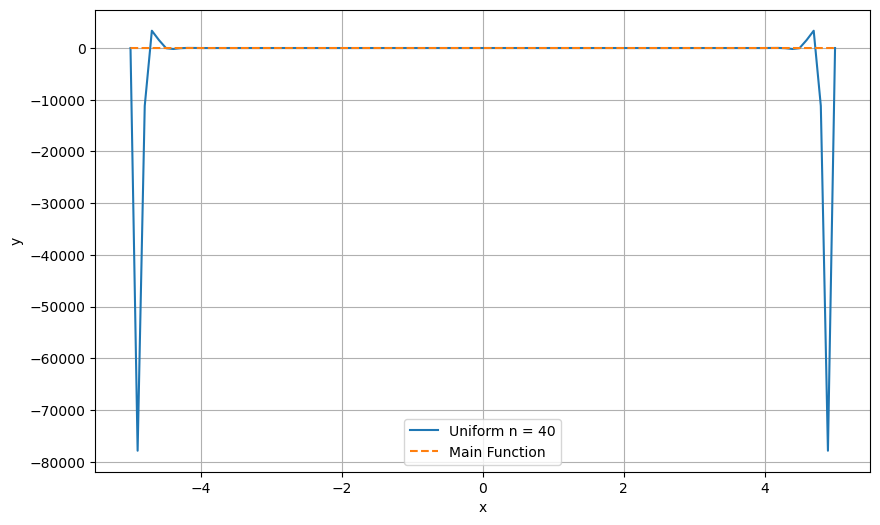

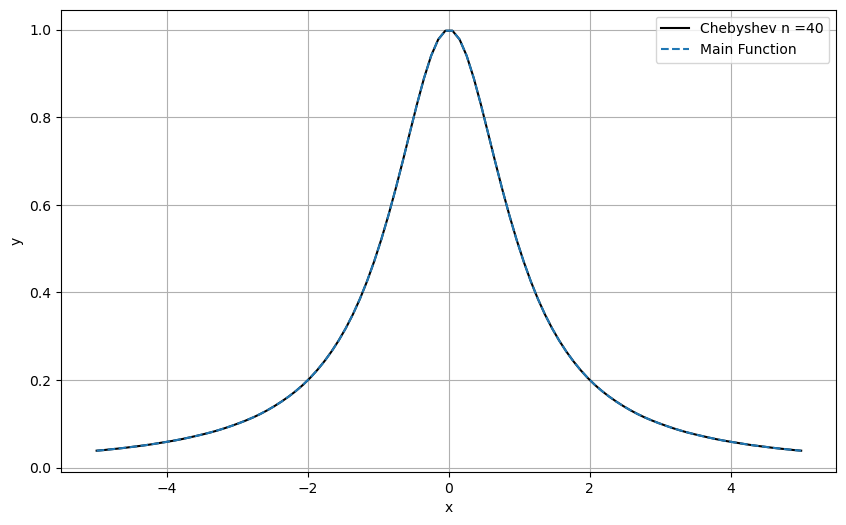

In [57]:
import math

def main_func(x):
    return(1 + x**2)**(-1)

## Creating Chebyshev nodes
def cheb_nodes(n):
    xc = []
    fc = []
    for k in range(n+1):
        xc.append(5*math.cos(((k+0.5)/(n+1))*math.pi))
        fc.append(main_func(xc[k]))
    return(xc, fc)

def cheb_nev_interpolant(n):
    xc, fc = cheb_nodes(n)

    def cheb_lam(x):
        return(Neville(xc, fc, x))

    return(cheb_lam)


def unif(n):
    xun = []
    fun = []
    for k in range(n+1):
        xun.append(5*(-1+ (2* (k/n))))
        fun.append(main_func(xun[k]))
    return(xun, fun)

def uni_interpolant(n):
    xun, fun = unif(n)
    
    def uni_lam(x):
        return(Neville(xun, fun, x))

    return(uni_lam)

    

n = [10, 20, 40]

x = np.linspace(-5, 5, 100)

for i in n:
    cheb_lam = cheb_nev_interpolant(i)
    uni_lam = uni_interpolant(i)

    cheb_values = [cheb_lam(xi) for xi in x]
    uni_values = [uni_lam(xi) for xi in x]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, uni_values, label = f'Uniform n = {i}')
    plt.plot(x, main_func(x), label = 'Main Function', linestyle = '--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.plot(x, cheb_values, label = f'Chebyshev n ={i}', color = 'black')
    plt.plot(x, main_func(x), label = 'Main Function', linestyle = '--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()





**Observation**: The oscillations at the edges of the uniformly distributed polynomials increases as step sizes increase (Runge's phenomenon). However, the Chebyshev polynomial has becomes more accurate when the size N increases because the Chebyshev points are not uniformly distributed within the interval and are more closely spaced towards the edges.

The Lebesque constant for different N values are:

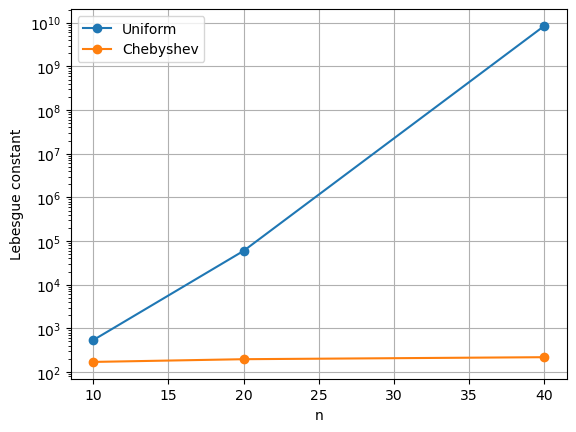

In [10]:
def lagrange_eval(x_values, i, x):
    l = 1
    for k in range(len(x_values)):
        if k!=i:
            l *= (x - x_values[k]) / (x_values[i] - x_values[k])
    return(l)

def l_constant(x_values, x):
    max_s = s = 0
    for i in x:
        for j in range(len(x_values)):
            s += abs(lagrange_eval(x_values, j, i))
        max_s = max(max_s, s)
    return(max_s)


x = np.linspace(-5, 5, 100)
l_uni = []
l_cheb = []

for i in n:
    xun, _ = unif(i)
    lambda_unif = l_constant(xun, x)
    l_uni.append(lambda_unif)

    xcheb, _ = cheb_nodes(i)
    lambda_cheb = l_constant(xcheb, x)
    l_cheb.append(lambda_cheb)

plt.semilogy(n, l_uni, label = 'Uniform', marker = 'o')
plt.semilogy(n, l_cheb, label = 'Chebyshev', marker = 'o')

plt.xlabel('n')
plt.ylabel('Lebesgue constant')
plt.legend()
plt.grid(True)
plt.show()

    

In [11]:
n = [20, 40]

log_uni = np.log(l_uni[1:])

b, log_C = (np.polyfit(n, log_uni, 1))

C = np.exp(log_C)

print("Estimated values\n", "b = ", b, "\n", "C = ", C)

Estimated values
 b =  0.5931630184436464 
 C =  0.4199250435343945
